# Image classification using CNN (CIFAR10 dataset)

### 1. Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### 2. Load and Preprocess Data

(50000, 32, 32, 3) (10000, 32, 32, 3)


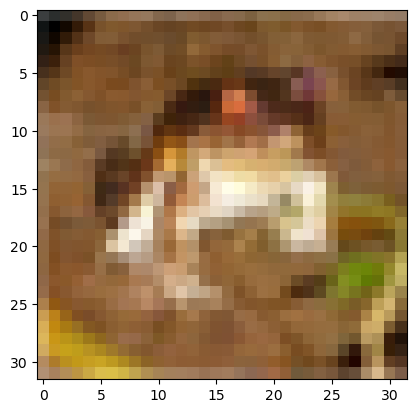

In [2]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Check shape of the data
print(X_train.shape, X_test.shape)

# Display a sample image from the dataset
plt.imshow(X_train[0])
plt.show()

### 3. Build CNN Model

In [3]:
# Define the CNN model
cnn = models.Sequential([
    
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the output
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation='relu'),

    # Output layer with 10 classes (for CIFAR-10)
    layers.Dense(10, activation='softmax')
])

# Print model summary
cnn.summary()

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

### 4. Compile and Train the Model

In [4]:
# Compile the CNN model
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
history = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.3508 - loss: 1.7475 - val_accuracy: 0.5464 - val_loss: 1.2657
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.5712 - loss: 1.2128 - val_accuracy: 0.5964 - val_loss: 1.1388
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6355 - loss: 1.0373 - val_accuracy: 0.6608 - val_loss: 0.9777
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6737 - loss: 0.9284 - val_accuracy: 0.6577 - val_loss: 0.9849
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.6985 - loss: 0.8522 - val_accuracy: 0.6817 - val_loss: 0.9214
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7209 - loss: 0.7887 - val_accuracy: 0.6857 - val_loss: 0.9098
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7415 - loss: 0.7380 - val_accuracy: 0.6874 - val_loss: 0.9122
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.7566 -

### 5. Evaluate Model

In [5]:
# Evaluate the model on the test set
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7029 - loss: 0.9044


[0.9112548828125, 0.7050999999046326]

### 6. Plot Accuracy and Loss


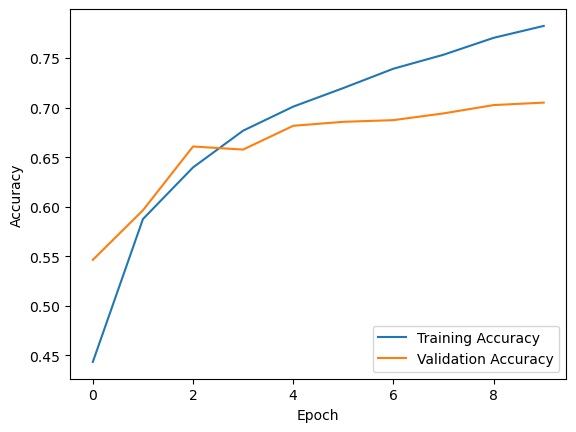

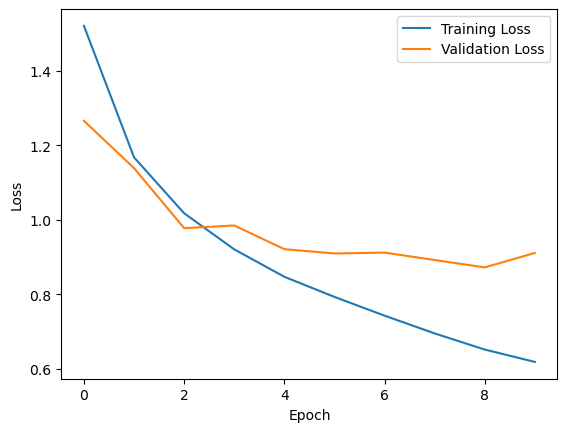

In [6]:
# Plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

### 7. Make Predictions

In [8]:
import numpy as np

# Make predictions on the test set
y_pred = cnn.predict(X_test)

# Convert predictions to class labels
y_pred_classes = [np.argmax(element) for element in y_pred]

# Display first 5 predictions
print("Predicted classes:", y_pred_classes[:5])
print("True classes:", y_test[:5])

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
Predicted classes: [3, 8, 8, 0, 4]
True classes: [[3]
 [8]
 [8]
 [0]
 [6]]
